<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-PyTorch-LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    y = (m * x + b ) + noise
    return x.numpy(), y.numpy()

## Data Visualization

Text(0, 0.5, 'y')

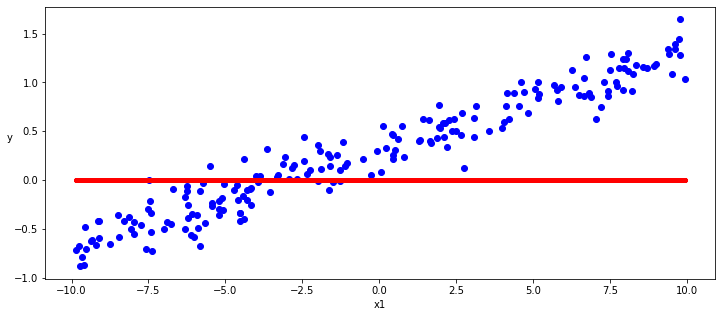

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras:
    def __init__(self):
        self.params = {
            "w" : tf.Variable(0.),
            "b" : tf.Variable(0.)
        }        

    def __call__(self,x): 
        y_pred = self.params["w"] * x + self.params["b"]
        return y_pred

# PyTorch Model

In [8]:
# class LinearRegressionPyTorch(torch.nn.Module): 
#     def __init__(self): 
#         super(LinearRegressionPyTorch, self).__init__() 
#         self.w = torch.tensor([0.0])
#         self.b = torch.tensor([0.0])
  
#     def forward(self, x):  
#         return x @ self.w + self.b
    
    
class LinearRegressionPyTorch(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionPyTorch, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  

    def forward(self, x):
        out = self.linear(x)
        return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()

for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
    dloss_dw,dloss_db = tape.gradient(loss, [tf_model.params["w"], tf_model.params["b"]])
    # adjusting 
    tf_model.params["w"].assign(tf_model.params["w"] - learning_rate*dloss_dw)
    tf_model.params["b"].assign(tf_model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.136420339345932
Step 40, Loss 0.10946626961231232
Step 60, Loss 0.10187827050685883
Step 80, Loss 0.09588779509067535
Step 100, Loss 0.09041578322649002
Step 120, Loss 0.08536636084318161
Step 140, Loss 0.08070386946201324
Step 160, Loss 0.07639841735363007
Step 180, Loss 0.07242270559072495
Step 200, Loss 0.06875147670507431
Step 220, Loss 0.06536141037940979
Step 240, Loss 0.062230948358774185
Step 260, Loss 0.05934023857116699
Step 280, Loss 0.056670915335416794
Step 300, Loss 0.0542060025036335
Step 320, Loss 0.05192987620830536
Step 340, Loss 0.04982806369662285
Step 360, Loss 0.047887202352285385
Step 380, Loss 0.04609499126672745
Step 400, Loss 0.044440027326345444
Step 420, Loss 0.04291181638836861
Step 440, Loss 0.041500624269247055
Step 460, Loss 0.040197521448135376
Step 480, Loss 0.038994207978248596


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()

criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = torch_model(inputs)

    loss = criterion(y_pred, labels)

    epoch_loss = loss.data

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
      print("Epoch {} : Loss {}".format(epoch, epoch_loss))


Epoch 0 : Loss 15.356593132019043
Epoch 20 : Loss 0.9260405898094177
Epoch 40 : Loss 0.07824297994375229
Epoch 60 : Loss 0.028377696871757507
Epoch 80 : Loss 0.0253920778632164
Epoch 100 : Loss 0.025164742022752762
Epoch 120 : Loss 0.02510341815650463
Epoch 140 : Loss 0.025055518373847008
Epoch 160 : Loss 0.025011803954839706
Epoch 180 : Loss 0.02497146837413311
Epoch 200 : Loss 0.024934226647019386
Epoch 220 : Loss 0.024899831041693687
Epoch 240 : Loss 0.024868069216609
Epoch 260 : Loss 0.02483874000608921
Epoch 280 : Loss 0.02481166645884514
Epoch 300 : Loss 0.024786652997136116
Epoch 320 : Loss 0.024763556197285652
Epoch 340 : Loss 0.024742238223552704
Epoch 360 : Loss 0.024722544476389885
Epoch 380 : Loss 0.02470436878502369
Epoch 400 : Loss 0.024687573313713074
Epoch 420 : Loss 0.024672066792845726
Epoch 440 : Loss 0.024657754227519035
Epoch 460 : Loss 0.024644531309604645
Epoch 480 : Loss 0.024632327258586884


# Data Visualization

In [13]:
[w, b] = torch_model.parameters()

tf_model.params["w"].numpy(), tf_model.params["b"].numpy(), w.tolist()[0][0], b.tolist()[0]

(0.09824903, 0.19629349, 0.09982479363679886, 0.3240152597427368)

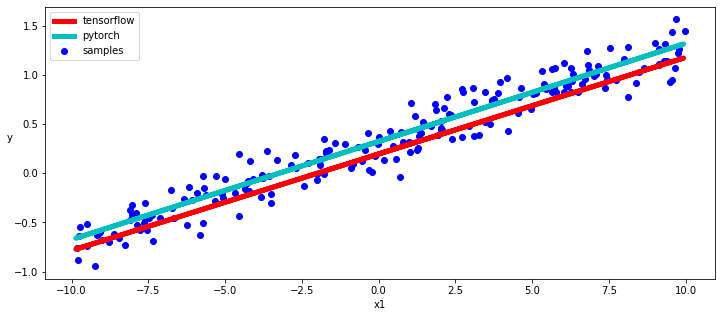

In [14]:
with torch.no_grad():
  x_train, y_train = generate_data()
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x_train,y_train, c = "b", label="samples")
  ax.plot(x, tf_model.params["w"] * x + tf_model.params["b"], "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w * inputs + b, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)